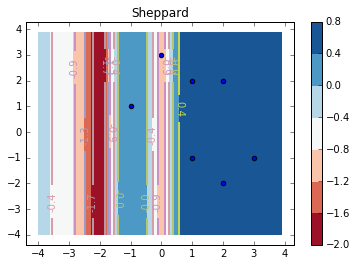

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

def evalSheppard(x,y,PX,PY,PZ,k):
    
    n = len(PX)
    s = np.zeros(n)
    wt = 0.0
    for i in range(n):
        if (x == PX[i]):
            return PY[i]        
        s[i] = 1.0/((abs(x-PX[i])))**k
        wt += s[i]
    for i in range(n):
        if (y == PY[i]):
            return PZ[i]
        sAux = 1.0/((abs(x-PY[i])))**k
        s[i] += sAux
        wt += sAux
    p = 0.0
    for i in range(n):
        p += PZ[i]*(s[i]/wt)
    return p

# the function that I'm going to plot

def eval_z_func(x,y,PX,PY,PZ,k):

    Z = np.zeros((len(x),len(y))) 

    for i in range(len(x)):

        for j in range(len(y)):

            Z[i,j]=evalSheppard(x[i,j],y[i,j],PX,PY,PZ,k)

    return Z


PX = [-1.0,0.0,1.0,2.0,3.0,2.0,1.0]

PY = [ 1.0,3.0,2.0,2.0,-1.0,-2.0,-1.0] 

PZ = [ 2.0,-1.0,3.0,1.0,2.0,-2.0,-3.0]


x = np.arange(-4.0,4.0,0.1)

y = np.arange(-4.0,4.0,0.1)

X,Y = np.meshgrid(x, y) # grid of point
#print(X)

Z = eval_z_func(X,Y,PX,PY,PZ,2) # evaluation of the function on the grid


# adding the Contour lines with labels

cset1 = plt.contourf(X,Y,Z,cmap=plt.cm.RdBu)

cset2 = plt.contour(X,Y,Z,np.arange(min(PZ),max(PZ),(max(PZ)-min(PZ))/(len(PZ)*2)),linewidths=2,cmap=plt.cm.Set2)

plt.scatter(PX,PY)

plt.clabel(cset2,inline=True,fmt='%1.1f',fontsize=10)

plt.colorbar(cset1) # adding the colobar on the right

# latex fashion title

plt.title('Sheppard')

plt.show()